In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math

from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib


from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix

from warnings import filterwarnings

filterwarnings("ignore", category=FutureWarning)

 Technical Task for Data Scientist
The dataset contains medical information about patients and their health. The task is to predict the likelihood of a stroke based on various factors.
Dataset description:
   

- id — patient identifier.
- gender — gender
- age — age of the patient
- hypertension — presence of hypertension
- heart_disease — presence of heart disease
- ever_married — whether the patient has ever been married 
- work_type — type of work
- Residence_type — type of residence 
- avg_glucose_level — average glucose level. 
- bmi — body mass index
- smoking_status — smoking status
- stroke — target variable

Data Exploration:
* Conduct an exploratory data analysis (EDA) to understand the structure of the dataset and identify key relationships between variables.
Data Preprocessing:
* Handle any necessary preprocessing, if it’s needed, to prepare the dataset for modeling.
Model Building:
* Split the data into training and test sets, and use any ML model to predict the likelihood of stroke (you must try at least one bagging and one boosting model)
* Choose the best model.
* Evaluate the performance of your model using appropriate metrics.
Feature Interpretation:
* Analyze the importance of features to interpret the model’s predictions.
Conclusion:
* Summarize your findings, suggest improvements for the model, and provide any recommendations based on the analysis.
Prepare scripts and files:
* Read on next page



 Notes
* All your work should be done using Python, all necessary libraries and Jupyter Notebook/Lab or Google
* As a result, you should have *.ipynb file with all your code and research
Prepare script and files
* Save your model as a local file(and other files, if you need), using joblib library
* Prepare Python script that:
* loads local model from file
* loads features from file, filename should be set through terminal argument (take ‘test’ part of data, but use unprocessed (original) version of data)
* makes predictions (result should be the same, as in your Notebook)
* saves predictions with record ID and predicted value as a local *.csv file
* the script should be launchable from the command line or terminal. Command:
> python <script> <input>
where:
<script> - Python script file <input> - file with inputs (features)
Note: model file should be loaded from inside script
* you don’t need to train model again in script, you just need to load local modal from file
* As a result, with *.ipynb file with research, you should also have model file, *.py script file, *csv file with inputs for model, *.csv file with model predictions
  

In [4]:
df = pd.read_csv('data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


 # Task1
 Conduct an exploratory data analysis (EDA) to understand the structure of the dataset and identify key relationships between variables. Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are missing values in the data (bmi) and errors in age.


In [8]:
df[df['age']<1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


so people with age<1 are children and probably of the age below 1 year. Check work_type='children'

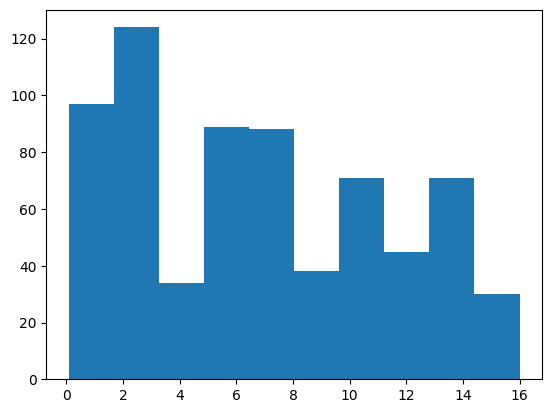

In [9]:
df[df['work_type']=='children']['age'].hist(grid=False);


so proved people of age under 18 are kids, so age <1 is normal (babies). Idea change smoking status of children under 5 years from 'Unknown' into 'never smoked'

In [10]:
df.loc[df['age']<=5, 'smoking_status']='never smoked'

In [11]:
df['id'].duplicated().sum()

0

no duplicated ids

In [18]:
cat_cols = ['gender', 
                'smoking_status', 
                'hypertension', 
                'heart_disease',
                'ever_married',  
                'work_type', 
                'Residence_type', 
                'smoking_status']
num_cols = ['age',
               'avg_glucose_level',
               'bmi']
target_col = ['stroke']

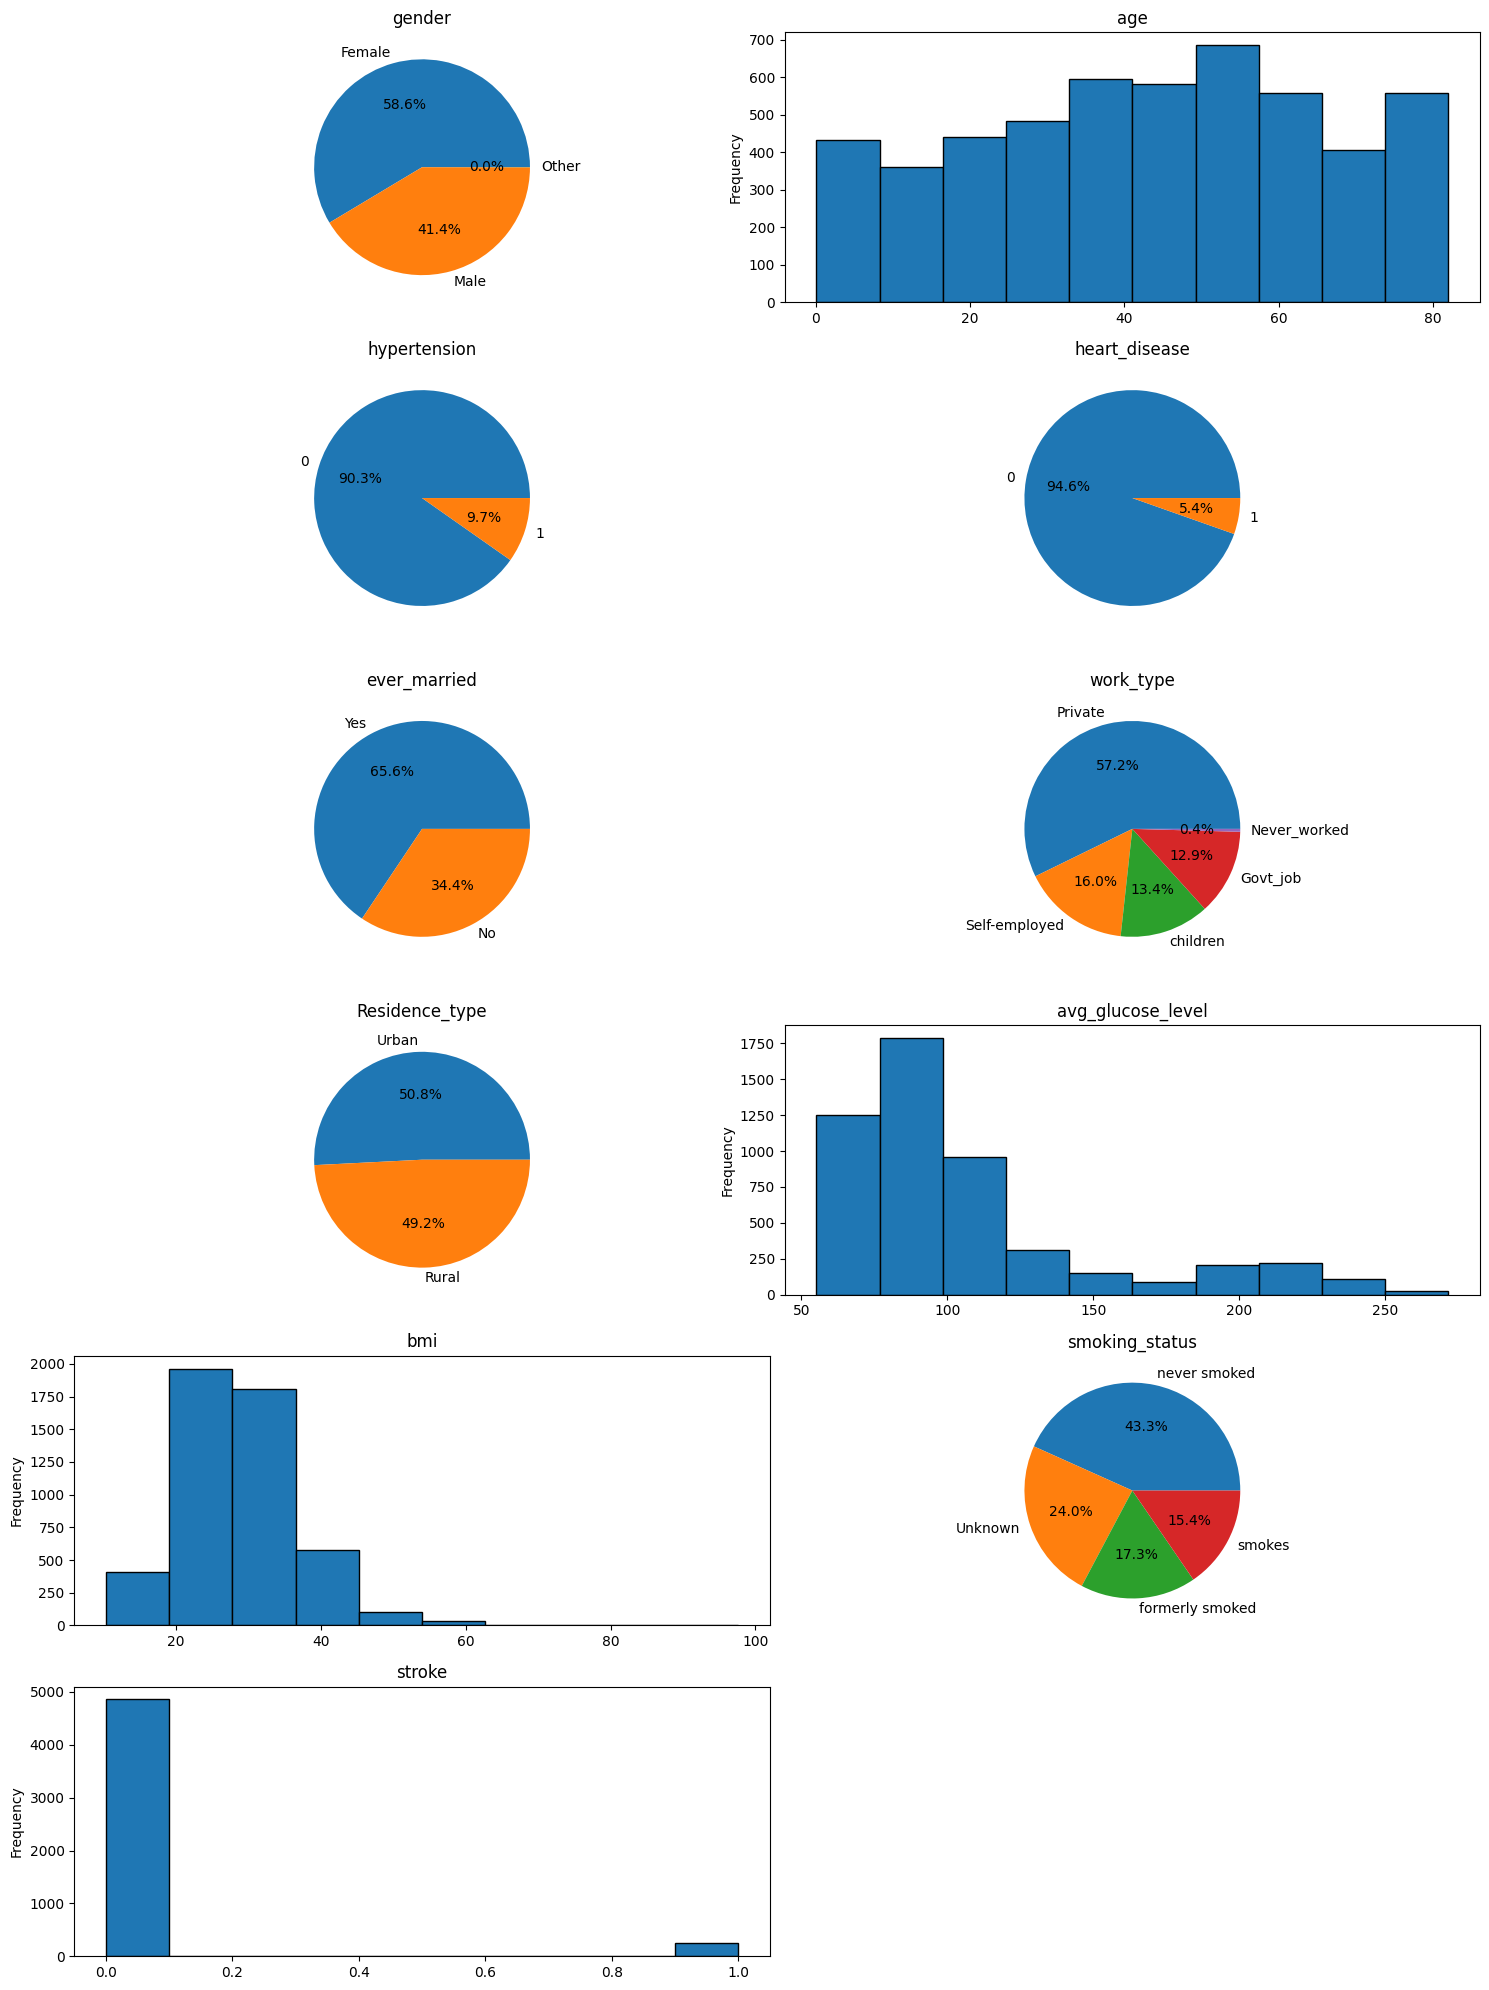

In [13]:
num_cols = 2
num_rows = math.ceil(len(df.columns[1:]) / num_cols) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()  # Упрощаем доступ к осям

for ax, col in zip(axes, df.columns[1:]):
    ax.set_title(col)
    if col in cat_cols or col == target:
        ax.pie(df[col].value_counts(), autopct="%1.1f%%", labels=df[col].value_counts().index)
    else:
        df[col].plot(kind="hist", ec="black", ax=ax)

# Удаляем лишние подграфики
for i in range(len(df.columns[1:]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout() 
plt.show()

problems:
1. we have some data with undefined gender, but persentage is low => OK
2. we have 201 missing values in bmi => need to deal with it
3. we have class disbalance in target => necessary to consider when splitting the data into test and target sets, and possibly use upsampling techniques

In [14]:
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


Заполнить значение индекса масссы средним или медианным значением будет некорректно, будем использовать модель, которая умеет работать с пропусками

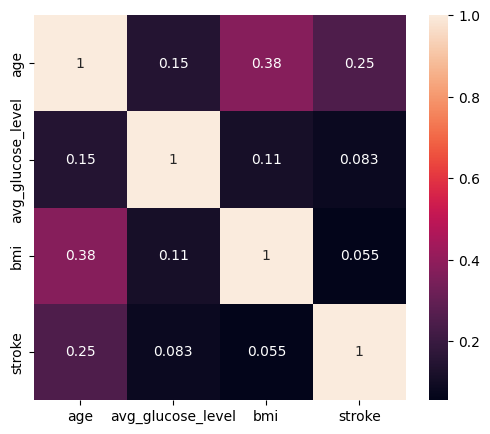

In [19]:
#correlation 

correlation_matrix = df[num_cols+target_col].corr(method='spearman')
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True);

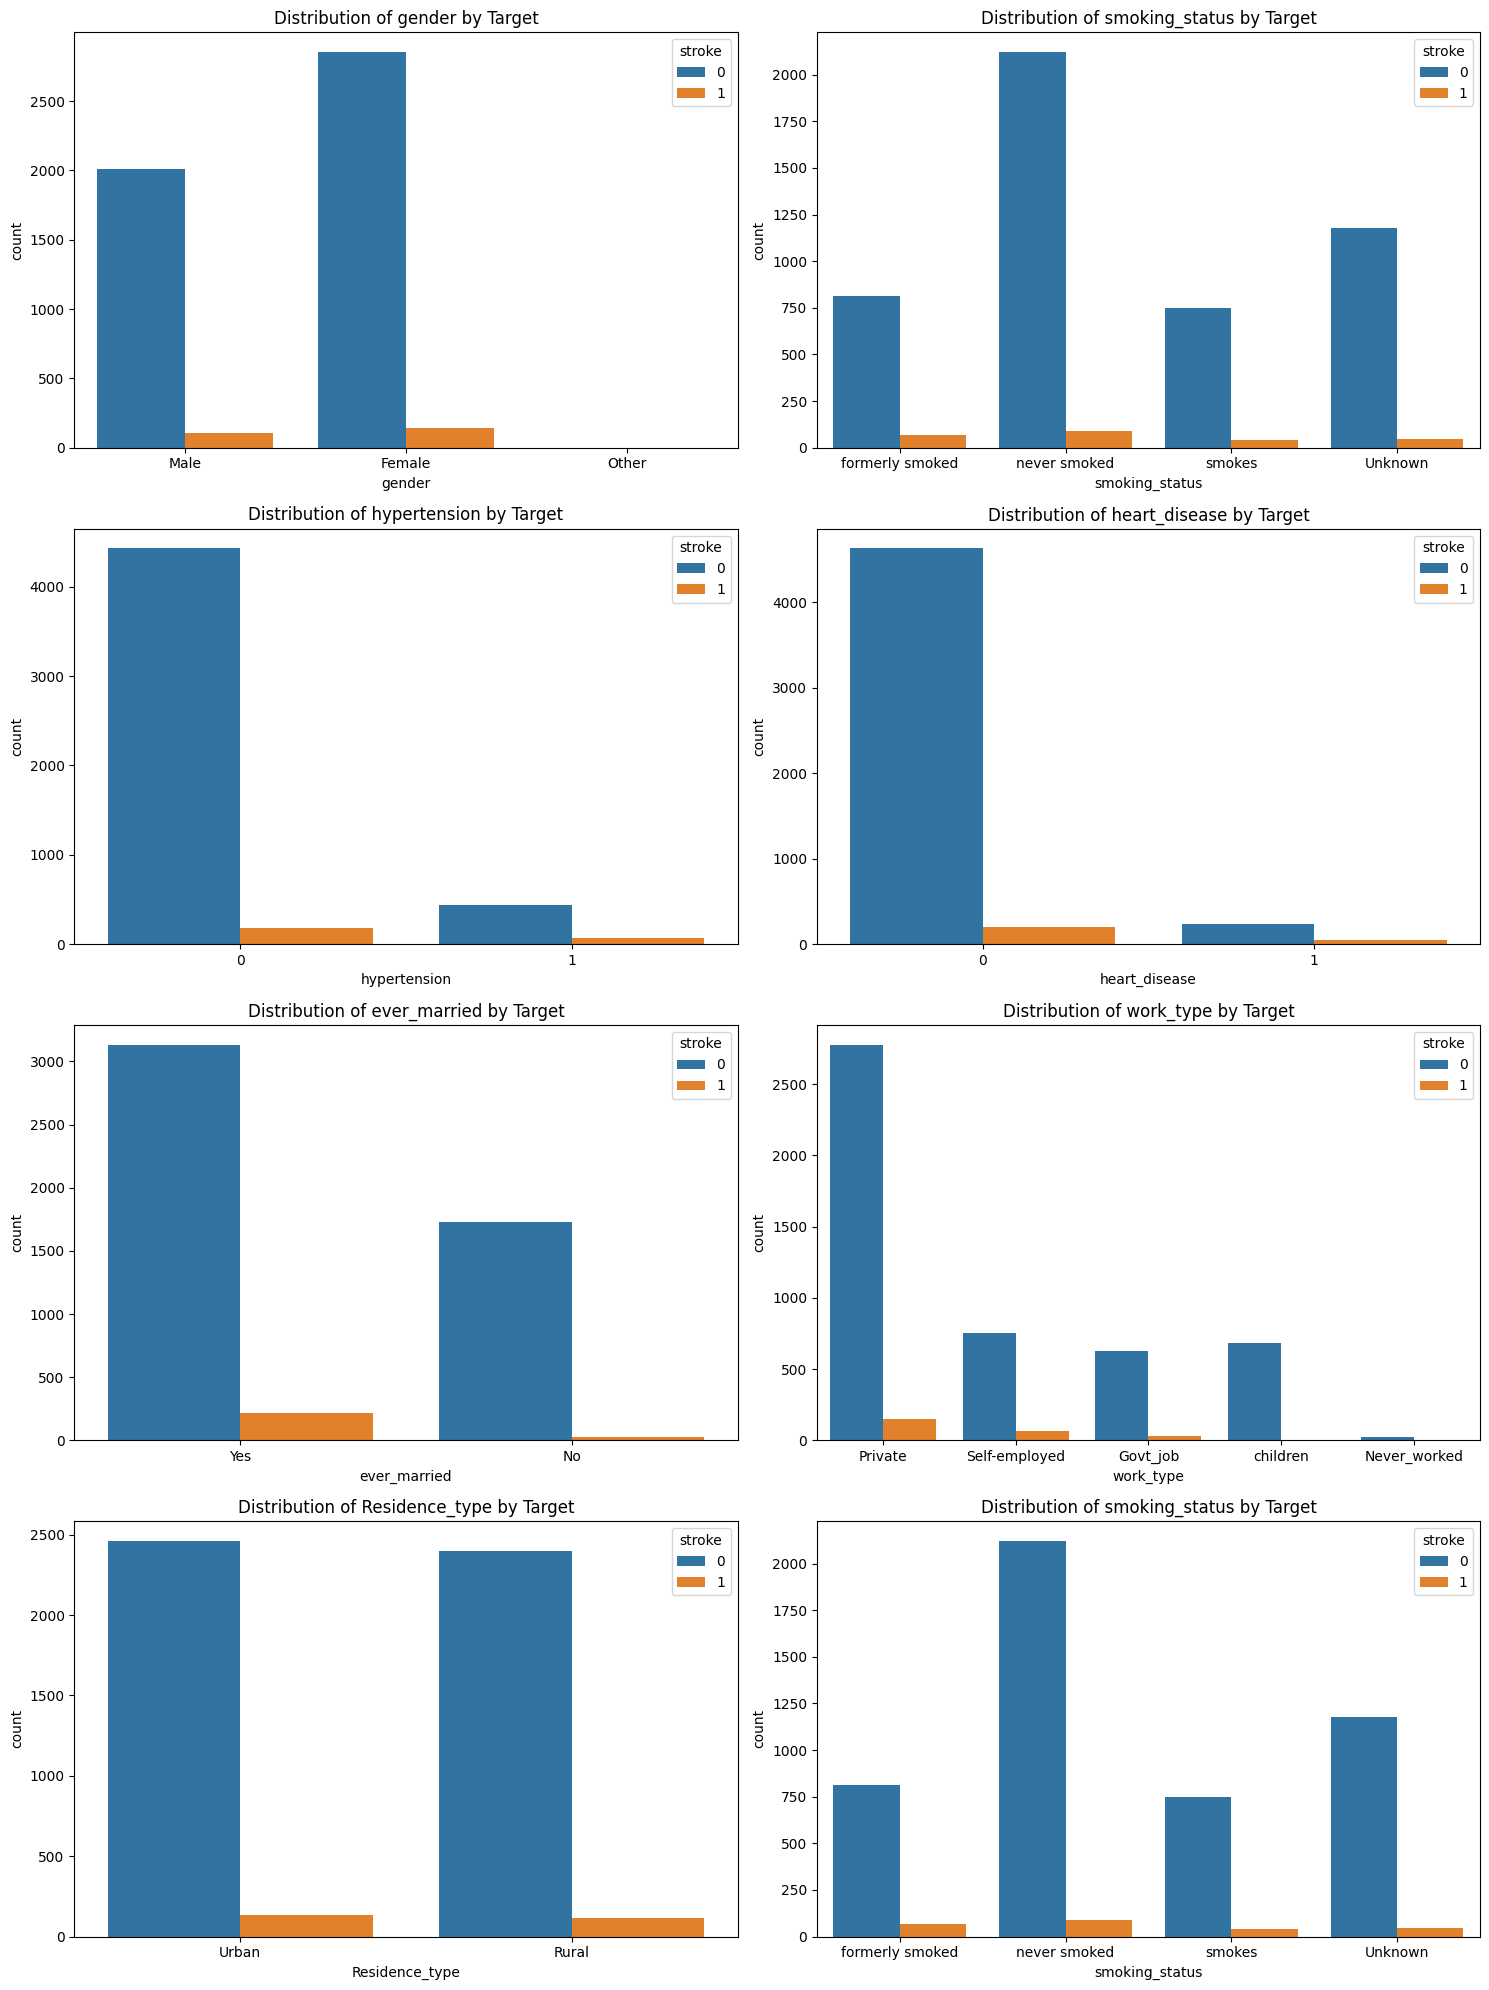

In [20]:
# Создание подграфиков
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='stroke', data=df, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col} by Target')  

plt.tight_layout()  
plt.show()

no detected clear dependencies

# Task 2 ML



Split the data into training and test sets, and use any ML model to predict the likelihood of stroke (you must try at least one bagging and one boosting model)

## Catboost

In [37]:
features = df.drop(['id','stroke'], axis =1)
target = df['stroke']
features.shape, target.shape

((5110, 11), (5110,))

In [22]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42, stratify=target)
features_train.shape

(3832, 10)

In [38]:
features_test.to_csv('test_features.csv', index=False)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1602,Female,62.0,0,0,Yes,Govt_job,Rural,73.44,23.4,Unknown
2966,Male,80.0,1,0,Yes,Self-employed,Rural,232.12,28.8,never smoked
1433,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked
2738,Female,43.0,0,0,Yes,Private,Urban,110.42,32.6,smokes
916,Male,63.0,0,0,Yes,Private,Rural,57.82,28.8,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
1936,Female,28.0,0,0,No,Private,Rural,75.53,34.9,never smoked
4859,Male,43.0,0,0,Yes,Private,Rural,66.22,34.4,Unknown
4701,Male,50.0,0,0,Yes,Private,Urban,120.44,30.3,never smoked
1834,Male,37.0,0,0,No,Private,Urban,90.95,24.6,smokes


In [23]:
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="F1",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=0,
)

PARAMS = {
    "n_estimators": [350],  # [5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.05],  # [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [4],  # np.arange(4, 20, 1),
    "l2_leaf_reg": [10],  # np.arange(0.1, 1, 0.05),
    "subsample": [0.6],  # [3, 5, 7, 10],
    "random_strength": [5],  # [1, 2, 5, 10, 20, 50, 100],
    "min_data_in_leaf": [100],  # np.arange(10, 1001, 10),
}
catboost.grid_search(PARAMS, features_train, target_train, cv=5, plot=True, refit=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.1463415	best: 0.1463415 (0)	total: 2.27s	remaining: 0us
Estimating final quality...


{'params': {'subsample': 0.6,
  'min_data_in_leaf': 100,
  'random_strength': 5,
  'depth': 4,
  'learning_rate': 0.05,
  'l2_leaf_reg': 10,
  'iterations': 350},
 'cv_results': defaultdict(list,
             {'iterations': [0, 349],
              'test-F1-mean': [0.0, 0.10420718816067653],
              'test-F1-std': [0.0, 0.05332383252657816],
              'train-F1-mean': [0.0, 0.18377663685049747],
              'train-F1-std': [0.0, 0.04835037201690049],
              'test-Logloss-mean': [0.6265157235068728, 0.15989300457357478],
              'test-Logloss-std': [0.001979685932016966, 0.007706907267182159],
              'train-Logloss-mean': [0.6265787977112189, 0.119319776707751],
              'train-Logloss-std': [0.001969224890726216,
               0.0035284416186701787]})}

got poor quality, we need to make some procedures to avoid class disbalance

In [26]:
def upsample_minority_class(features_train, target_train, num=0.5):
    

    df = pd.concat([features, target], axis=1)

    
    # Отделяем классы
    majority_class_df = df[df['stroke'] == 0]
    minority_class_df = df[df['stroke'] == 1]
    n=int(len(majority_class_df)*num)
    minority_upsampled = minority_class_df.sample(n,  replace=True, random_state=42) 
    upsampled_df = pd.concat([majority_class_df, minority_upsampled])
    print ('rows aded:', n)
    print ('0 class:', round(len(upsampled_df[upsampled_df['stroke'] == 0])/len(upsampled_df),2)  )
    print ('1 class:', round(len(upsampled_df[upsampled_df['stroke'] == 1])/len(upsampled_df),2)  )

    return upsampled_df.drop(columns=['stroke']), upsampled_df['stroke']



In [27]:

features_upsampled_train, target_upsampled_train = upsample_minority_class(features, target, 1)
features_upsampled_train.shape, target_upsampled_train.shape

rows aded: 4861
0 class: 0.5
1 class: 0.5


((9722, 10), (9722,))

In [28]:
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="F1",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=0,
)

PARAMS = {
    "n_estimators": [350],  # [5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.05],  # [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [4],  # np.arange(4, 20, 1),
    "l2_leaf_reg": [10],  # np.arange(0.1, 1, 0.05),
    "subsample": [0.6],  # [3, 5, 7, 10],
    "random_strength": [5],  # [1, 2, 5, 10, 20, 50, 100],
    "min_data_in_leaf": [100],  # np.arange(10, 1001, 10),
}
catboost.grid_search(PARAMS, features_upsampled_train, target_upsampled_train, cv=5, plot=True, refit=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8859259	best: 0.8859259 (0)	total: 2.97s	remaining: 0us
Estimating final quality...


{'params': {'subsample': 0.6,
  'min_data_in_leaf': 100,
  'random_strength': 5,
  'depth': 4,
  'learning_rate': 0.05,
  'l2_leaf_reg': 10,
  'iterations': 350},
 'cv_results': defaultdict(list,
             {'iterations': [0, 349],
              'test-F1-mean': [0.7785323779981856, 0.894621040190445],
              'test-F1-std': [0.00941160600338288, 0.007347680498023562],
              'train-F1-mean': [0.7812822803714866, 0.9046950694715623],
              'train-F1-std': [0.014068145522929315, 0.0030030953641222223],
              'test-Logloss-mean': [0.6720348862872563, 0.30621494219722456],
              'test-Logloss-std': [0.0016847213687879708, 0.01190641841164752],
              'train-Logloss-mean': [0.671730299634821, 0.285971430533141],
              'train-Logloss-std': [0.0012540029437771469,
               0.0030158817882697856]})}

In [32]:
print("Best score:", end=' ')
print(catboost.best_score_)
best_params = catboost.get_params()
for f in ("cat_features", "logging_level", "eval_metric"):
    best_params.pop(f)
print("Best params:", end=' ')
print(best_params)

Best score: {'learn': {'Logloss': 0.2780560711226853, 'F1': 0.91365171249397}}
Best params: {'random_seed': 0, 'metric_period': 1000, 'grow_policy': 'Lossguide', 'subsample': 0.6, 'min_data_in_leaf': 100, 'random_strength': 5, 'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 10, 'iterations': 350}


In [44]:
probabilities = catboost.predict_proba(features_test)[:, 1]


In [45]:
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5] 
for threshold in thresholds:
    predictions = (probabilities > threshold).astype(int)  # Применяем новый порог
    
    # Создание матрицы ошибок
    cm = confusion_matrix(target_test, predictions)
    
    # Вычисление recall
    recall = recall_score(target_test, predictions)
    f1 = f1_score(target_test, predictions)
    
    print(f"threshold: {threshold}")
    print("confusion matrix:")
    print(cm)
    print(f"Recall: {recall:.4f}")
    print(f"F1: {f1:.4f}\n")
  



threshold: 0.3
confusion matrix:
[[893 323]
 [  1  61]]
Recall: 0.9839
F1: 0.2735

threshold: 0.35
confusion matrix:
[[937 279]
 [  2  60]]
Recall: 0.9677
F1: 0.2993

threshold: 0.4
confusion matrix:
[[979 237]
 [  3  59]]
Recall: 0.9516
F1: 0.3296

threshold: 0.45
confusion matrix:
[[1005  211]
 [   4   58]]
Recall: 0.9355
F1: 0.3505

threshold: 0.5
confusion matrix:
[[1040  176]
 [   4   58]]
Recall: 0.9355
F1: 0.3919



In [50]:
predictions = (probabilities > 0.4).astype(int)

prediction_notebook = pd.DataFrame({'Predicted': predictions})

prediction_notebook.to_csv('predictions_notebook.csv', index=False)
prediction_notebook 

,Predicted
0,0
1,1
2,0
3,0
4,0
...,...
1273,0
1274,0
1275,0
1276,0


treshhold = 0.4 is OK for our target metric

In [35]:
joblib.dump(catboost, 'trained_catboost.joblib')

['trained_catboost.joblib']

## Bagging (Random Forest)
